###Applications

Focusing on a set of selected algorithms from time-series models in computational finance to imabalanced learning in fraud detection to active learning to reduce the number of training labels.

####**HMMs**

Two popular algorithms built upon Markov chains - the page rank algroithm and the EM algorithm for HMMs.

**Recap Markov models**


A Markov model for a sequence of random variables $x1, .., x_T$ of order 1 is a joint probability model that can be factorized as
$$
p(x_1, \dots, x_T) = p(x_1) p(x_2|x_1) \dots p(x_T|x_{T-1}) = p(x_1) \prod_{t=2}^{T} p(x_t|x_{t-1})
$$


Each factor is a conditional distribution conditioned by one rv, meaning each factor depends on the previous state with a memory of 1. We say, $X_t-1$ serves as a sufficient statistic for $T_t$. A sufficient statistic is a function of sample data (sum or mean) that contains all the information needed to estimate an unknown parameter in a statistical model.


**Transition probability**

For a discrete state sequence $x_t$ in ${1,...,K}$ we represent the transition probability as $KxK$ stochastic matrix
$A_{ij} = P(X_t = j \mid X_{t-1} = i)$ where $Sum_j(A_ij) =1$ for every $i$


If the transition matrix is independent over time, we call the Markov chain stationary or time invariant. We are interested in stationary distribution, and we compute it. $\pi_1(j) = \sum_i (\pi_0(i) \cdot A_{ij})$


Raising the transition matrix A to a power of n is equivalent to modeling n-hops or transitions of the Markov chain. After some time we reach a state when left with multiplying the row state vector $\pi$ by the same matrix A gives us the same vector $\pi$. We found the stationary distribution - equal to vector $\pi$, which is an eigenvector of A that corresponds to the eigenvalue of 1. Stationary distribution exists iff the chain is recurrent (it can return to any state with probability 1 and is aperiodic).

**Hidden Markov Models**

HHMs represent time-series data in application, based on discrete state Markov chain with latent states $z_t$ in ${1,...,K}$, a transition matrix $K$, and an emission matrix $E$ that models observed data $X$ emitted from each state.


We write the joint probability density


Joint-distribution =(Initial-state-distribution * State-transition-distribution * State-emission-distribution)

$$p(z_{1:T}, x_{1:T} | \theta) = p(z_{1:T} | \theta) p(x_{1:T} | z_{1:T}, \theta) $
$= p(z_1 | \pi) \left[ \prod_{t=2}^{T} p(z_t | z_{t-1}, A) \right] \left[ \prod_{t=1}^{T} p(x_t | z_t, E) \right]$$

Here $\theta = {\pi, A, E}$ are HMM parameters, $\theta-sym$ initial state distribution. The number of states K is often determined by the application. Data can be discrete ose continuous. We focus on the discrete case in which the emission matrix $E_{kl} = p(x_t = l, z_t = k)$. The transition matrix is assumed to be time invariant $A_{ij} = P(z_t = j | z_{t-1} = i)$.


We are interested in predicting the unobserved latent state z based on emitted observations x at any given time, calling it quantity $a_t(j) = p(z_t = j | x_{1:t})$.

$$p(z_t = j \mid x_{1:t-1}) = \sum_{i} A(i, j) \alpha_{t-1}(i)$$

In the prediction ste, we are summing over all possible i states, and multiplying alpha by the transition matrix into j state.
$\alpha_t$ ~ $E_t (A^T \alpha_t-1)$
given the recursion in alpha andthe initial condition, we compute the latent state marginals. The algorithm is referred to as the forward algorithm.




The base case in the algorithm is given by:
$\beta_T(i) = P(X_{T+1:T} \mid z_T = i) = 1$
This is true since the sequence ends at time $T$ and $X_{T+1:T}$ is a nonevent with probability 1. Having computed both alpha and beta, we combine them to produce the smoothed marginals: $t_t(j) \approx \alpha_t(j) \beta_t(j)$.


We can decode the maximum likelihood sequence of transitions between the latent state variables $z-t$.
$z^* = \arg \max_{z_{1:T}} (p(z_{1:T} | x_{1:T}))$. Let $delta_t(j)$ be the probability of ending up in state $j$, given the most probable path sequence
$$\delta_t(j) = \max_{z_1 \dots z_{t-1}} p(z_t = j, z_{1:t-1} | x_{1:t})$$

We can represent it recursively as
$$\delta_t(j) = \max_i \left[ \delta_{t-1}(i) \cdot A(i,j) \cdot E_t(j) \right]$$

The algorithm is known as Viterbi algorithm

In the **Viterbi Algorithm**, we have forward_backward and viterbi functions. In the first we construct a sparse matrix X of emissions indicators, compute forward prob. alpha (normalizing in every iteration) and backward prob. beta and the marginals mulptiplying alpha and beta. The viterbi function computes the delta_t. After code is compelte with viterbi decoder we retrieve the MLE of each state transitions z.


$
\begin{array}{l}
\mathbf{class} \text{ HMM}: \\
\quad \mathbf{function} \text{ forward\_backward}(\text{observations}): \\
\quad \quad \mathbf{for} \ t = 1 \ \mathbf{to} \ n: \\
\quad \quad \quad \alpha_t = \text{normalize}(E_t \cdot A^T \alpha_{t-1}) \\
\quad \quad \mathbf{end \ for} \\
\quad \quad \mathbf{for} \ t = n-1 \ \mathbf{down \ to} \ 1: \\
\quad \quad \quad \beta_t = \text{normalize}(A(E_{t+1} \beta_{t+1})) \\
\quad \quad \mathbf{end \ for} \\
\quad \quad \gamma = \alpha \odot \beta \\
\quad \quad \mathbf{return} \ \gamma, \alpha, \beta
\\
\quad \mathbf{function} \text{ viterbi}(\text{observations}): \\
\quad \quad \mathbf{for} \ t = 1 \ \mathbf{to} \ n: \\
\quad \quad \quad \delta_t[j] = \max_{i} \left( \delta_{t-1}[i] \times A[i,j] \times E_t[j] \right) \\
\quad \quad \mathbf{end \ for} \\
\quad \quad \mathbf{return} \ \text{backtrack}(\delta)
\end{array}
$

###Imbalanced Learning

#####**Sampling Strategies**

Resampling techniques 1. undersmapling the majority class, 2. over-sampling the minority class, 3. combining over and under sampling 4. creating ensemble of datasets

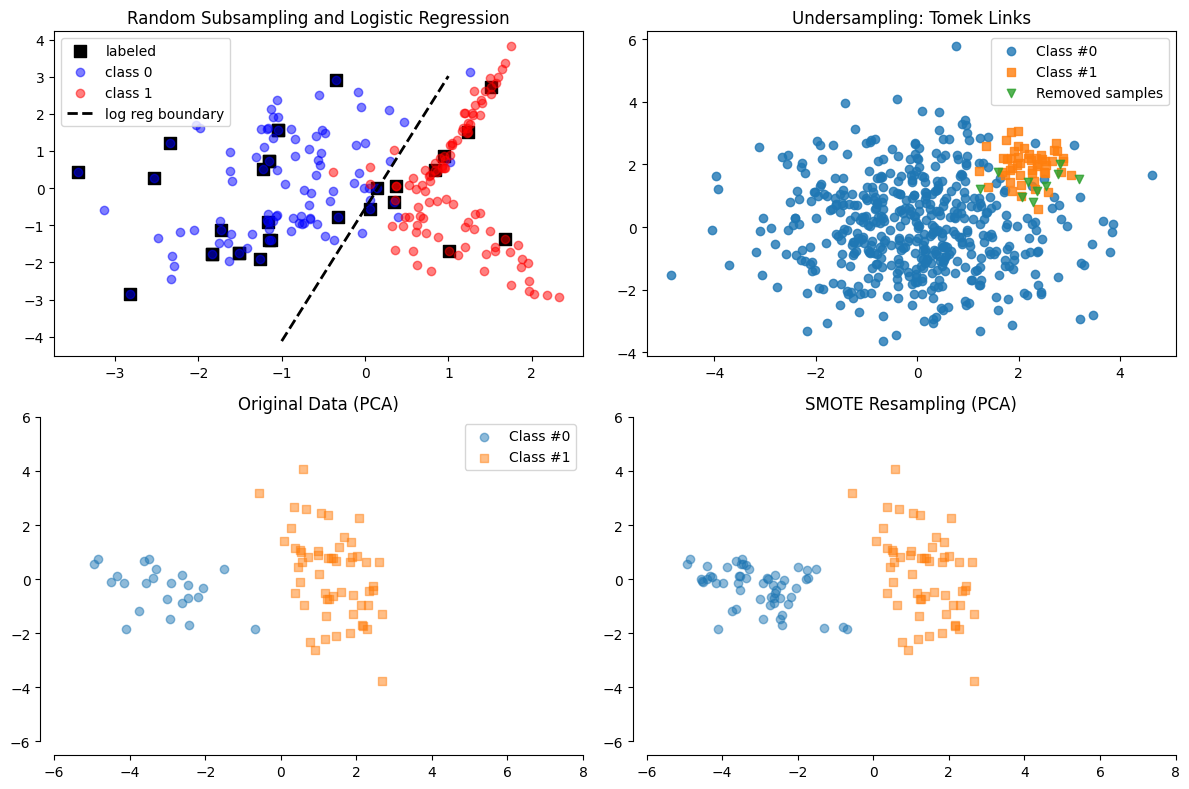

In [ ]:
''' Random subsampling, Tomek links, Original set (SMOTE), SMOTE '''

####**Active Learning**

####**Hyperparameter Tuning**